In [1]:
%matplotlib notebook

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/home/cloud-user/.config/matplotlib/stylelib/paper.mplstyle", line #9
  (fname, cnt))


In [2]:
import networkx as nx
import numpy as np
import matplotlib as mpl

from scipy import sparse
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
from scipy.linalg import eigh as scipy_eigh
from numpy.linalg import eigh as numpy_eigh

from mixing_result_helpers import (
    load_example_graphs, conductance, init_p0, flatten, get_relevant_matrices,
    plot_Ct_list, plot_Ct_list_in_order,
    plot_Ut_list, plot_Ut_list_in_order,
    plot_curves
)    

In [3]:
barbell_graph, line_graph, lattice, complete_graph = load_example_graphs()

# PageRank (non-personalzied)

In [4]:
alpha = 0
seed = 0

In [5]:
def plot_C_t_in_order_for_graphs(alpha, k, step):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3), gridspec_kw = {'width_ratios':[6] * 4 + [1]})
    for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
        ax = axes[i]

        Wl, sock = get_relevant_matrices(g)
        p0 = init_p0(g, seed)

        plot_Ct_list_in_order(
            Wl, sock, p0, alpha, ax, log=False, k=k, step=step, cm_name='Oranges'
        )
        ax.set_title('{}'.format(g.graph['name']))    
        ax.set_xlabel('x')
        ax.set_ylim([0, 1.2])

    axes[0].set_ylabel('$C_t$')    
    for ax in axes[1:]:
        ax.set_ylabel('')

    cmap = mpl.cm.Oranges
    norm = mpl.colors.Normalize(vmin=0, vmax=10)

    cb1 = mpl.colorbar.ColorbarBase(axes[4], cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    axes[4].set_ylabel('t')    

def plot_U_t_in_order_for_graphs(alpha, k, step):
    fig, axes = plt.subplots(1, 5, figsize=(13, 3), gridspec_kw = {'width_ratios':[6] * 4 + [1]})
    for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
        ax = axes[i]
        plot_Ut_list_in_order(
            g.number_of_edges(), g.graph['phi'], alpha, ax=ax, k=100, step=10, log=True, cm_name='Blues'
        )
        ax.set_title('{}'.format(g.graph['name']))    
        ax.set_xlabel('x')

    axes[0].set_ylabel('$U_t$')    
    for ax in axes[1:]:
        ax.set_ylabel('')

    cmap = mpl.cm.Blues
    norm = mpl.colors.Normalize(vmin=0, vmax=100)

    cb1 = mpl.colorbar.ColorbarBase(axes[4], cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    axes[4].set_ylabel('t')    

<IPython.core.display.Javascript object>


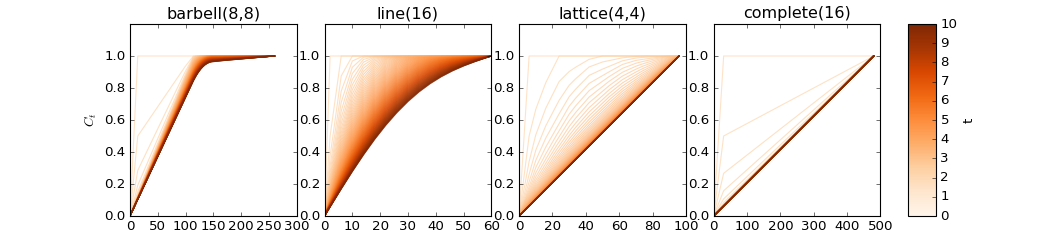

In [6]:
plot_C_t_in_order_for_graphs(alpha, 100, 1)

<IPython.core.display.Javascript object>


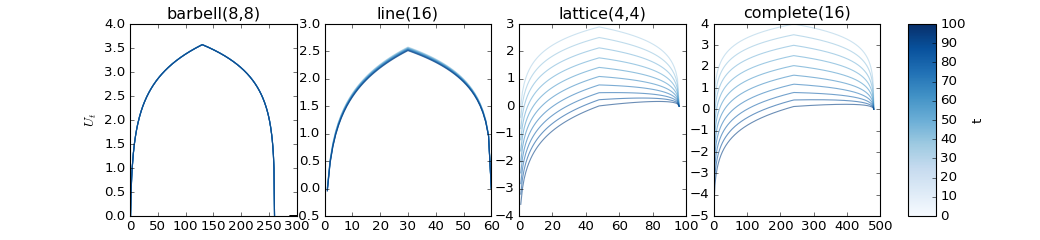

/home/cloud-user/code/signed/mixing_result_helpers.py:194: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


In [7]:
plot_U_t_in_order_for_graphs(alpha, 100, 1)

<IPython.core.display.Javascript object>


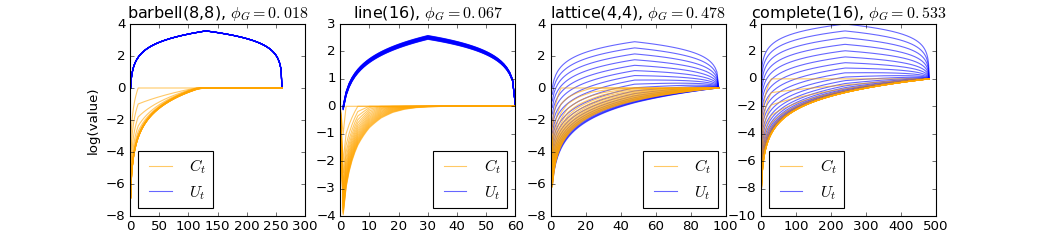

n/m=24/65
n/m=16/15
n/m=16/24
n/m=16/120


/home/cloud-user/code/signed/mixing_result_helpers.py:122: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


In [8]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
    plot_curves(g, seed=0, alpha=alpha, k=200, step=10, use_log=True, ax=axes[i])
for ax in axes[1:]:
    ax.set_ylabel('')

# Personalized PageRank ($\alpha=0.5$)

In [9]:
alpha = 0.5

<IPython.core.display.Javascript object>


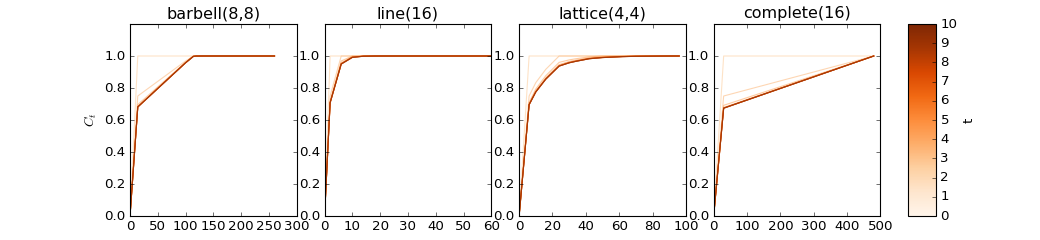

In [10]:
plot_C_t_in_order_for_graphs(alpha, 10, 1)

<IPython.core.display.Javascript object>


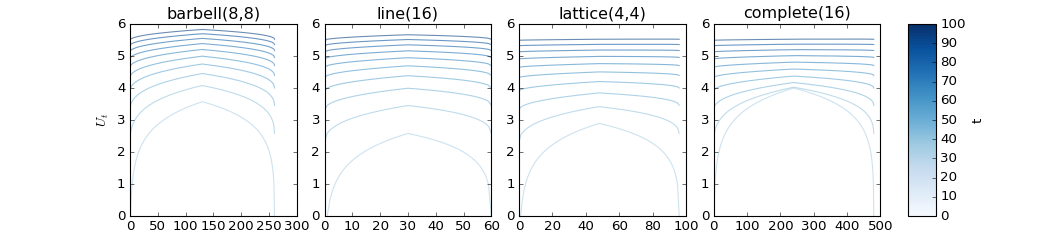

/home/cloud-user/code/signed/mixing_result_helpers.py:194: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


In [11]:
plot_U_t_in_order_for_graphs(alpha, 10, 1)

<IPython.core.display.Javascript object>


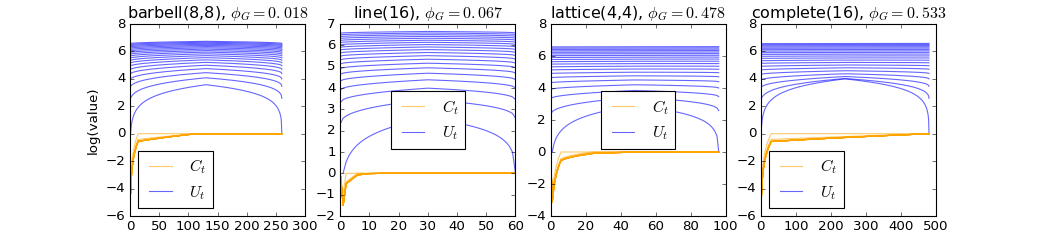

n/m=24/65
n/m=16/15
n/m=16/24
n/m=16/120


/home/cloud-user/code/signed/mixing_result_helpers.py:122: RuntimeWarning: divide by zero encountered in log2
  Ui = np.log2(Ui)


In [12]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
for i, g in enumerate([barbell_graph, line_graph, lattice, complete_graph]):
    plot_curves(g, seed=0, alpha=alpha, k=200, step=10, use_log=True, ax=axes[i])
for ax in axes[1:]:
    ax.set_ylabel('')